# Dataset

Este dataset, Pima Indians Diabetes Database, procede del National Institute of Diabetes and Digestive and Kidney Diseases.

Su objetivo es predecir si un paciente tiene o no diabetes, basándose en determinadas mediciones diagnósticas. Se impusieron varias restricciones a la selección de estos casos de una base de datos más amplia. En particular,todos los pacientes son mujeres de al menos 21 años y de ascendencia india Pima.

La variable diagnóstica a predecir es Outcome.

Las features (variables predictoras) del dataset son las siguientes:

* Pregnancies: Number of times pregnant
* Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
* BloodPressure: Diastolic blood pressure (mm Hg)
* SkinThickness: Triceps skin fold thickness (mm)
* Insulin: 2-Hour serum insulin (mu U/ml)
* BMI: Body mass index (weight in kg/(height in m)^2)
* DiabetesPedigreeFunction: Diabetes pedigree function (DPF) calculates diabetes
likelihood depending on the subject's age and his/her diabetic family history.
* Age (years)

La práctica consta de 4 apartados, cada uno con la ponderación de nota que se indica.

# A. (20%) Modelo de Regresión Logística

Presenta los resultados del modelo proporcionando los siguientes cálculos:

* Accuracy
* Matriz de confusión
* Informe de clasificación

# Cargamos los datos

In [4]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from datetime import date
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler, RobustScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# Import CSV

df = pd.read_csv('./diabetes.csv')

# Análisis exploratorio (EDA)

Revisaremos las estadísticas básicas y la distribución de cada variable para comprender mejor el conjunto de datos.

In [5]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
# Verificando la presencia de valores nulos
missing_values = df.isnull().sum()

# Conteo de valores únicos para cada columna
unique_values = df.nunique()

# Valores nulos y valores únicos
print (f"Valores nulos: \n\n {missing_values }\n")
print (f"Valores únicos: \n\n {unique_values}")

Valores nulos: 

 Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Valores únicos: 

 Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                51
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64


**Valores Nulos:**

No hay valores nulos explícitos en ninguna de las columnas.

**Valores Únicos:**

Las variables tienen una amplia gama de valores únicos, indicando una buena variabilidad en los datos.

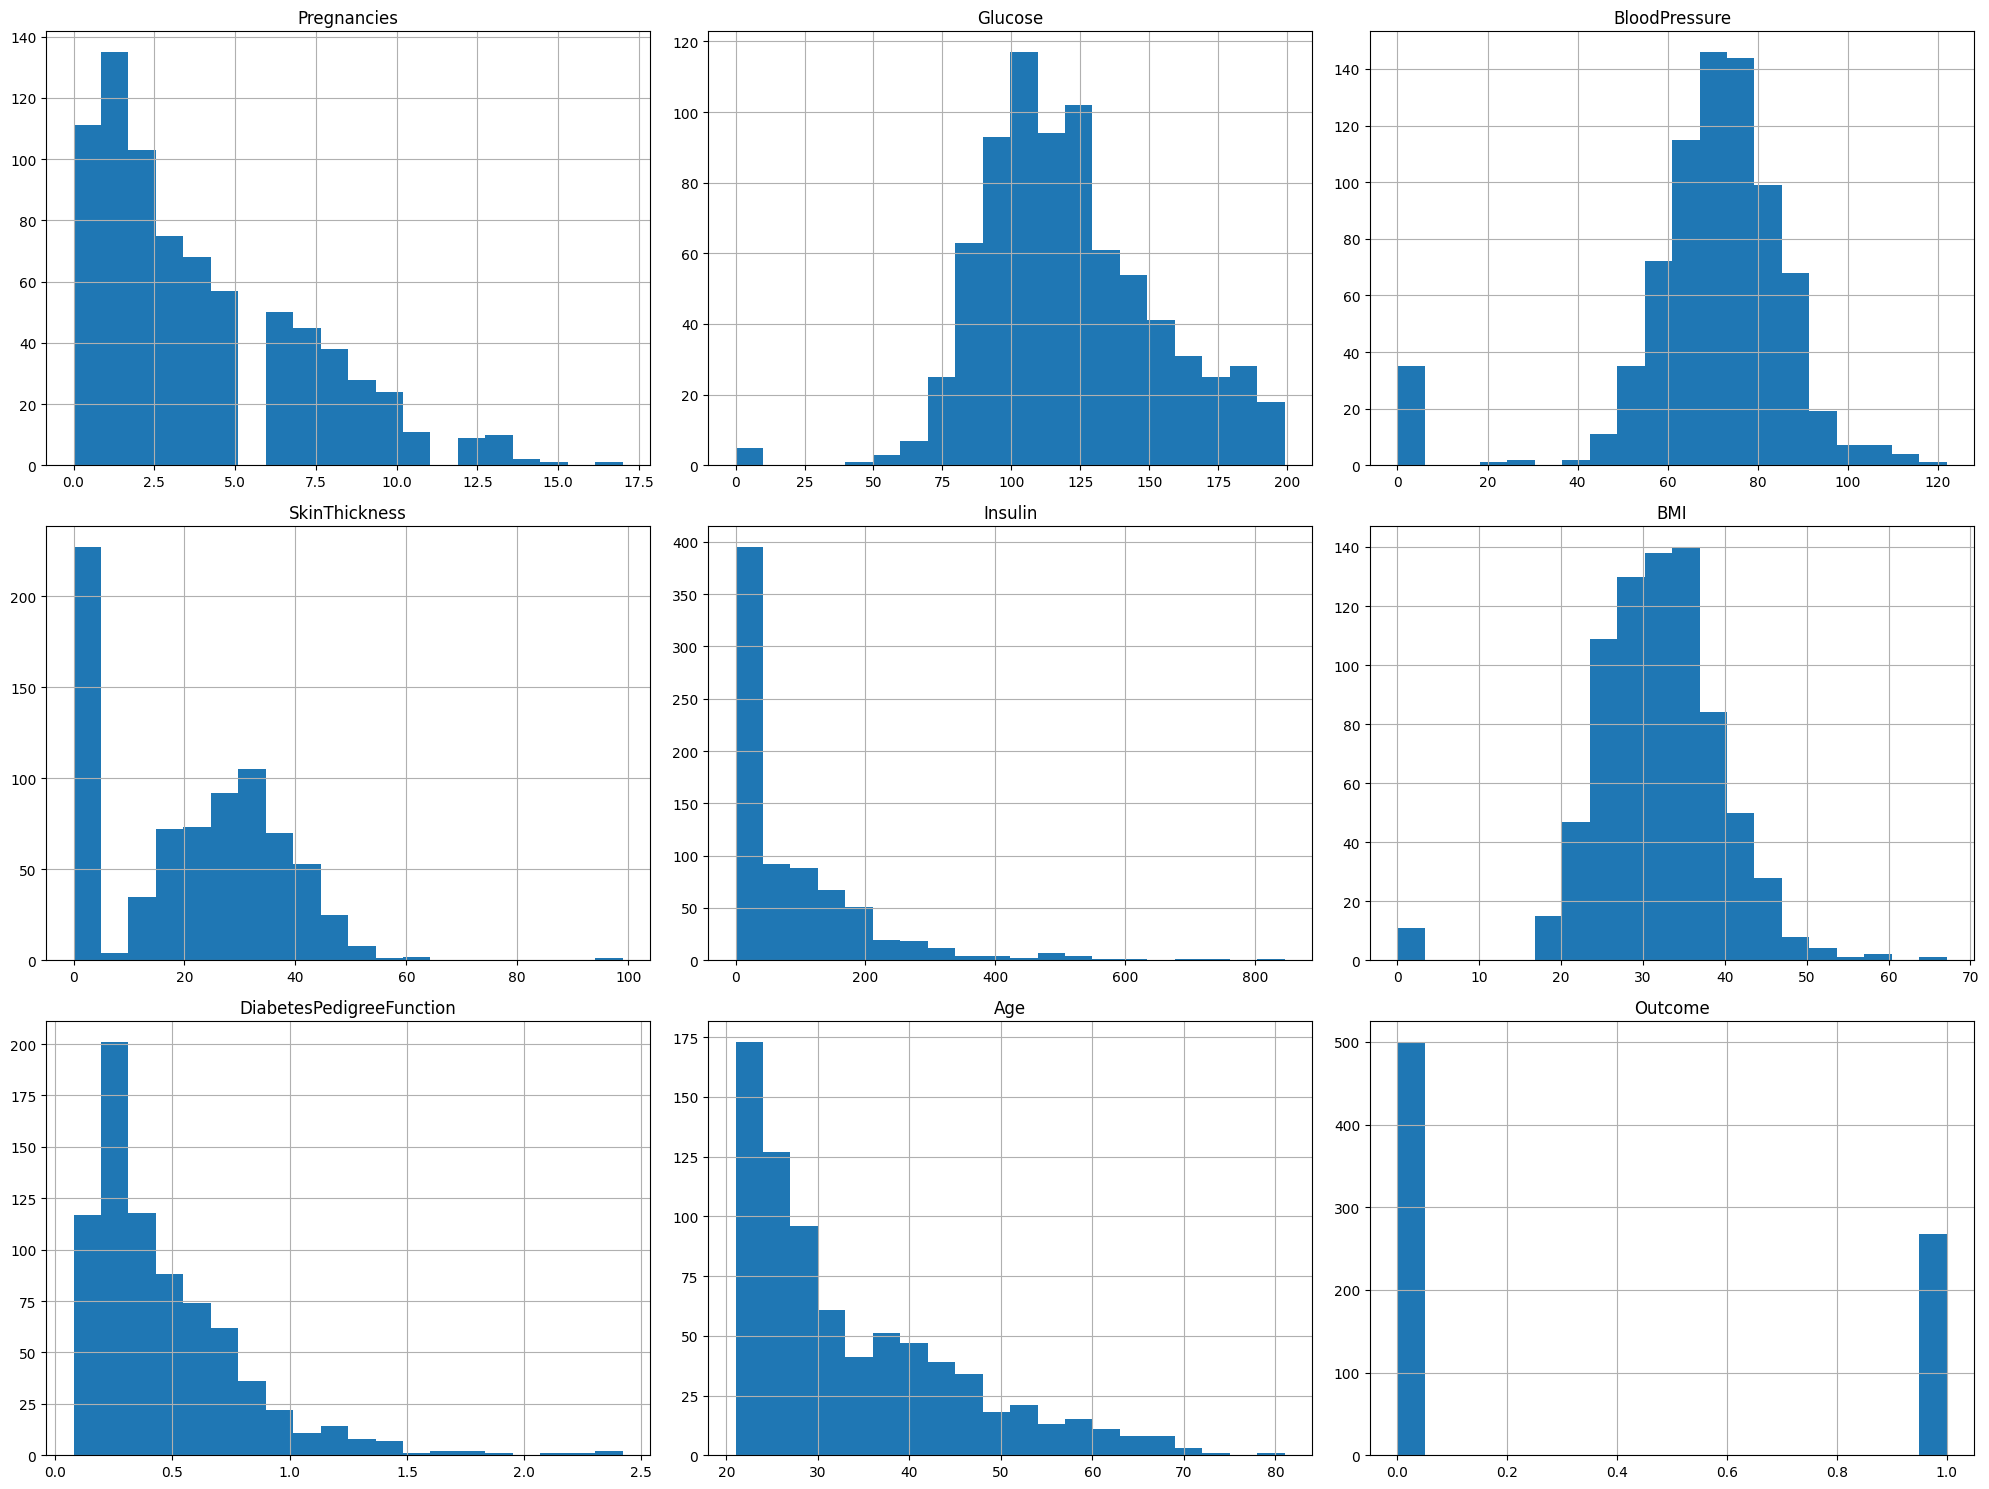

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Análisis Exploratorio de Datos (EDA)

# Estadísticas básicas
estadisticas_basicas = df.describe()

# Histogramas para cada variable
plt.figure(figsize=(20, 15))
for i, columna in enumerate(df.columns, 1):
    plt.subplot(3, 3, i)
    df[columna].hist(bins=20)
    plt.title(columna)

plt.tight_layout()
plt.show()

estadisticas_basicas

**Estadísticas Descriptivas:**

Hay 768 observaciones en total.
Las variables como Glucosa, Presión Arterial, Espesor de la Piel, Insulina y BMI tienen valores mínimos de 0, lo que podría indicar la presencia de valores atípicos o datos faltantes codificados como cero.
Las variables tienen diferentes rangos y desviaciones estándar, lo que sugiere que podrían beneficiarse de una normalización o estandarización antes de la modelización.

A pesar de no haber valores faltantes, se pueden observar columnas con 0 valores, por ejemplo en pregnancy, lo cual puede necesitar una revisión adicional.

In [9]:
import pandas as pd
import numpy as np

# Carga tus datos
# df = pd.read_csv('tu_archivo.csv')  # Asumiendo que tus datos están en un archivo CSV

# Nombre de tu variable dependiente
variable_dependiente = 'Outcome'

# Filtrar las columnas numéricas
columnas_numericas = df.select_dtypes(include=np.number).columns.tolist()

# Eliminar la variable dependiente de la lista de columnas numéricas si está presente
if variable_dependiente in columnas_numericas:
    columnas_numericas.remove(variable_dependiente)

# Análisis para cada variable independiente
for columna in columnas_numericas:
    # Agrupar por la columna y calcular la proporción de cada valor de 'outcome'
    agrupado = df.groupby(columna)[variable_dependiente].value_counts(normalize=True).unstack()

    # Identificar los valores donde 'outcome' es siempre 0 o siempre 1
    siempre_0 = agrupado[agrupado[0] == 1].index.tolist()
    siempre_1 = agrupado[agrupado[1] == 1].index.tolist()

    print(f"En la variable '{columna}':")
    print(f"   Valores con 'outcome' siempre 0: {siempre_0}")
    print(f"   Valores con 'outcome' siempre 1: {siempre_1}")
    print("\n")

En la variable 'Pregnancies':
   Valores con 'outcome' siempre 0: []
   Valores con 'outcome' siempre 1: [14, 15, 17]


En la variable 'Glucose':
   Valores con 'outcome' siempre 0: [44, 56, 57, 61, 62, 65, 67, 68, 71, 72, 73, 74, 75, 76, 77, 79, 81, 82, 83, 86, 87, 89, 91, 94, 96, 98, 99, 110, 127, 153, 157, 191]
   Valores con 'outcome' siempre 1: [149, 156, 160, 163, 167, 168, 169, 170, 171, 172, 174, 176, 177, 178, 181, 182, 184, 186, 187, 188, 190, 195, 196, 198, 199]


En la variable 'BloodPressure':
   Valores con 'outcome' siempre 0: [24, 38, 44, 46, 55, 61, 95, 122]
   Valores con 'outcome' siempre 1: [40, 102, 104, 114]


En la variable 'SkinThickness':
   Valores con 'outcome' siempre 0: [8, 10, 11, 16, 50, 52, 54, 60]
   Valores con 'outcome' siempre 1: [49, 51, 56, 63, 99]


En la variable 'Insulin':
   Valores con 'outcome' siempre 0: [15, 16, 18, 22, 23, 25, 32, 37, 38, 40, 41, 42, 43, 44, 45, 46, 49, 50, 51, 52, 53, 54, 55, 56, 57, 59, 60, 61, 63, 65, 66, 67, 68, 71, 72

- En pregnancies vemos que algunos valores altos (14,15,17), tienen siempre diabetes.

- En glucose observamos que existen valores a partir de 44 que tienen un 100% de personas sin diabetes, y que a su vez, algunos valores altos entre 149 y 199 que tienen un 100% de personas con diabetes en ese valor.

- En BloodPressure, algunos valores específicos tienen un 100% de diabetes y otros un 100% sin diabetes. Hay que observar cuantos valores hay en esas columnas, para conocer si es algo relevante o casos aislados.

- En SkinThickness, vemos que algunos valores tienen un 100% de diabetes y otros un 100% de no diabetes.

- En Insulin vemos bastantes valores con un 100% de diabetes o 100% de no diabetes, al igual que ocurre en BMI y en Diabetes PedigreeFunction

En la  mayoria de variables, encontramos estos 100% en valores altos, que son aquellos con muestras mas pequeñas.

# Mapa de correlaciones

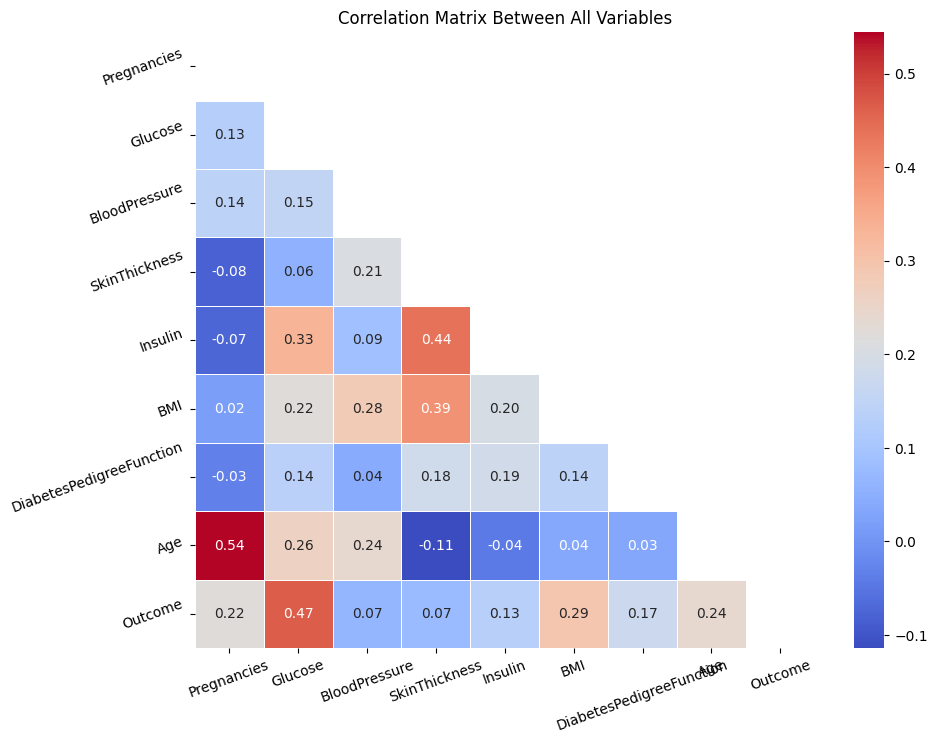

In [10]:
num_list2 = df.select_dtypes(include=['float64', 'int64'])

def correlation_analysis(dataframe):
    """
    Calculates and visualizes correlations between all numerical variables.

    Parameters
    - Data: Pandas DataFrame, the data set to be analyzed for correlation.
    """
    # Calculate correlations between all variables
    num_list2 = df.select_dtypes(include=['float64', 'int64'])
    corr_matrix = num_list2.corr()

    # Use heatmap for visualization
    plt.figure(figsize=(10, 8))
    mask = np.triu(np.ones_like(corr_matrix))
    sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5,mask=mask )
    plt.xticks(rotation=20)
    plt.yticks(rotation=20)
    plt.title("Correlation Matrix Between All Variables")
    plt.show()

correlation_analysis(num_list2)


Las variables con correlaciones más significativas con Outcome son:

* Pregnancies

* Glucose

* Insulin

* BMI

* DiabetesPedigreeFunction

Existen correlaciones significativas entre:

* Pregnancies y Age: lo cual es lógico y entiendo que aportan diferente información por lo que añadiré ambas al modelo.

* Glucose y Age: Tienen una correlación de 0.26, esto es algo natural y entiendo que aportan información diferente por lo que añadiré ambas al modelo.

* BloodPressure tiene correlación moderada con Age, BMI, SkinThickness y muy poca correlación con la variable dependiente, en principio, a falta de mayor información, no añadiré esta variable al modelo.

* Skinthickness: Tiene alta correlación con BMI e Insulin, además es una variable que se usa comunmente para predecir el BMI, por lo que su correlación es normal, en principio no añadiré esta variable al modelo.

* Insulin: Tiene correlaciones moderadas y es una variable clara para el diagnóstico de la diabetes, por lo que la incluiré en el modelo

* BMI: Es una variable con alta correlación, en principio se añade al modelo

* DiabetesPedigreeFunction: Esta variable puede aportar algo de la información histórica familiar del paciente, por lo que nos aporta información util al modelo.

* Age: La edad es un factor importante en el diagnóstico de la fiabetes, su correlación con Outcome es significativa en comparación con el resto de variables, por lo que se añadirá al modelo.

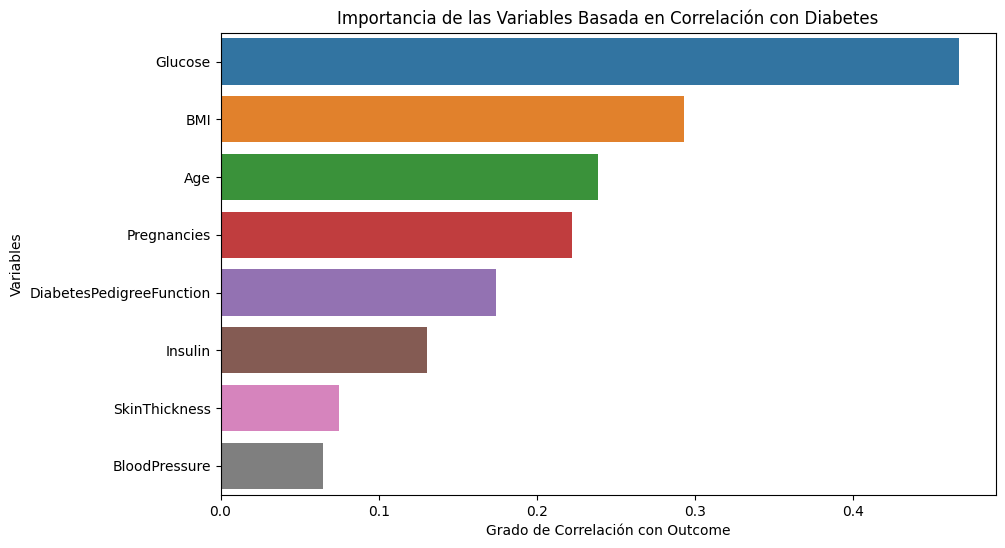

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Crear la matriz de correlaciones
correlation_matrix = df.corr()

# Ordenar las correlaciones de las variables predictoras con respecto a 'Outcome'
correlation_con_outcome = correlation_matrix['Outcome'].sort_values(ascending=False)

# Eliminar la correlación de 'Outcome' consigo mismo para centrarse solo en las variables predictoras
correlation_con_outcome = correlation_con_outcome.drop('Outcome')

# Crear un gráfico de barras para visualizar la importancia de las variables
plt.figure(figsize=(10, 6))
sns.barplot(x=correlation_con_outcome.values, y=correlation_con_outcome.index)
plt.title('Importancia de las Variables Basada en Correlación con Diabetes')
plt.xlabel('Grado de Correlación con Outcome')
plt.ylabel('Variables')
plt.show()

# RandomForest para ver la importancia de las variables

In [12]:
# Variables

X = df.drop(['Outcome'], axis=1)
y = df['Outcome']

# Entrenamiento de un modelo Random Forest para evaluar la importancia de las variables
rf = RandomForestClassifier(n_estimators=100, random_state=82)
rf.fit(X, y)
feature_importances = rf.feature_importances_ * 100

# Mapeo de la importancia de las características a los nombres de las variables
features_rf = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances}).sort_values(by='Importance', ascending=False)

features_rf

,Feature,Importance
1,Glucose,26.355644
5,BMI,16.577827
7,Age,13.586409
6,DiabetesPedigreeFunction,12.403406
2,BloodPressure,8.669683
0,Pregnancies,8.339344
4,Insulin,7.419709
3,SkinThickness,6.647977


**Importancia de Variables en el Modelo Random Forest:**

**Glucosa**: La más influyente con una importancia del 26.35%.

**BMI**: Sigue en importancia con un 16.57%.

**DiabetesPedigreeFunction**: 13.58% de importancia.

**Edad**: Importancia del 12.40%.

**BloodPressure**: Importancia de 8.66%

**Embarazos**: 8.33% de importancia.

**Insulina**: 7.42%

**Grosor de la piel**: 6.65% de importancia.

A pesar de observar mayor importancia en BloodPressure que en Pregnancies o Insulin, sabemos que BloodPressure tiene correlación con BMI y pregnancies e insulin son indicadores importantes en el diagnóstico de la diabetes.

# Conclusiones del análisis de importancia de las variables

* La Glucosa y el BMI son importantes en ambos análisis.

* La DiabetesPedigreeFunction y la Edad también son relevantes, aunque su importancia varía entre los dos métodos.

Con la matriz de correlaciones capturamos relaciones lineales mientras que con el RandomForest podemos capturar relaciones no lineales.

# Selección de variables

**Las variables seleccionadas para el modelo de regresión logística son:**


* Glucosa: Es un indicador primario de diabetes, ya que niveles altos de glucosa en sangre son un signo de la diabetes, además muestra una correlación fuerte con Outcome.

* BMI (Indice de masa corporal): El BMI es un factor de riesgo conocido para la diabetes, ya que la obesidad puede afectar la forma en que el cuerpo usa la insulina. Además, también tiene una correlación alta con Outcome. (Añadir al final, que tiene alta importancia en el Random Forest)

* Edad: Es un factor de riesgo importante, especialmente en la diabetes tipo 2, así que la incluyo por su correlación con Outcome y su relevancia clínica.

* Pregnancies (Embarazos): En las mujeres el número de embarazos tiene una relación con la diabetes gestacional y con riesgo incrementado de diabetes tipo 2 en un futuro, es una variable muy relevante en la población de estudio (mujeres Pima). (Tambien tiene alta importancia en el modelo de Random Forest)

* DiabetesPedigreeFunction: Esta variable predice la diabetes basada en el historial familiar, con esta variable podemos capturar el riesgo hereditario.

**Las variables no seleccionadas para el modelo:**

* Skin Thickness (Grosor de la piel): Su relación no es tan directa con la diabetes, usualmente se ha usado para estimar la grasa corporal, (de ahi su correlación), no muestra correlación fuerte con Outcome.


**Variables a probar**

Las correlaciones indican una mayor importancia a insulina, mientras que RandomForest indica una mayor importancia a Blood Pressure. Por tanto vamos a entrenar dos modelos, incluyendo una variable y otra.

* Insulina: Presenta mayor correlación que Blood Pressure, niveles anormales de insulina son un sintoma de la diabetes, aunque presenta correlación moderada con glucosa.

* Blood Presure (Presión arterial): La hipertension es un factor de riesgo para la diabetes, y RandomForest indica una mayor importancia a Blood Pressure.

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, balanced_accuracy_score, recall_score, f1_score,  precision_score

# Selección de variables basada en el análisis
X_mi_seleccion = df[["Glucose", 'BMI', 'Age', 'Pregnancies', 'DiabetesPedigreeFunction', 'Insulin']]

# Dividiendo los datos con mi selección de variables
X_train_mi, X_test_mi, y_train_mi, y_test_mi = train_test_split(X_mi_seleccion, y, test_size=0.30, random_state=82)

# Creando y entrenando el modelo con mi selección, como no estoy usando el scaler, hago 1000 iteraciones
logreg_mi = LogisticRegression(max_iter=1000)
logreg_mi.fit(X_train_mi, y_train_mi)

# Obteniendo las probabilidades predichas para la clase positiva
y_pred_probs = logreg_mi.predict_proba(X_test_mi)[:, 1]

# Define un umbral
nuevo_umbral = 0.3

# Aplicando el umbral para clasificar las predicciones
y_pred_umbral = (y_pred_probs >= nuevo_umbral).astype(int)

# Evaluando el modelo con el  umbral
nueva_accuracy = accuracy_score(y_test_mi, y_pred_umbral)
nueva_balanced_accuracy = balanced_accuracy_score(y_test_mi, y_pred_umbral)
nueva_conf_matrix = confusion_matrix(y_test_mi, y_pred_umbral)
nuevo_class_report = classification_report(y_test_mi, y_pred_umbral)

# Imprimir los resultados con el umbral
print(f"Modelo con Umbral {nuevo_umbral}:\n")
print(f"Accuracy: {nueva_accuracy}\n")
print(f"Balanced Accuracy Score: {nueva_balanced_accuracy}\n")
print(f"Matriz de Confusión:\n{nueva_conf_matrix}\n")
print(f"Informe de Clasificación:\n{nuevo_class_report}")


Modelo con Umbral 0.3:

Accuracy: 0.7575757575757576

Balanced Accuracy Score: 0.7580363091272485

Matriz de Confusión:
[[115  37]
 [ 19  60]]

Informe de Clasificación:
              precision    recall  f1-score   support

           0       0.86      0.76      0.80       152
           1       0.62      0.76      0.68        79

    accuracy                           0.76       231
   macro avg       0.74      0.76      0.74       231
weighted avg       0.78      0.76      0.76       231



In [17]:
from sklearn.metrics import confusion_matrix
y_true = [0, 1, 0, 1]
y_pred = [0, 1, 0, 0]
conf_matrix = confusion_matrix(y_true, y_pred)
print(conf_matrix)

[[2 0]
 [1 1]]


Esta comprobación indica que la estructura de la matriz de confusion de SKlearn usa la siguiente convencion:

TN | FP

FN | TP


Utilizando insulin como variable obtenemos:

- 115 Verdaderos negativos de un total de 152 negativos reales
- 37 Falsos positivos
- 19 Falsos negativos
- 60 Verdaderos positivos de un total de 79 positivos reales

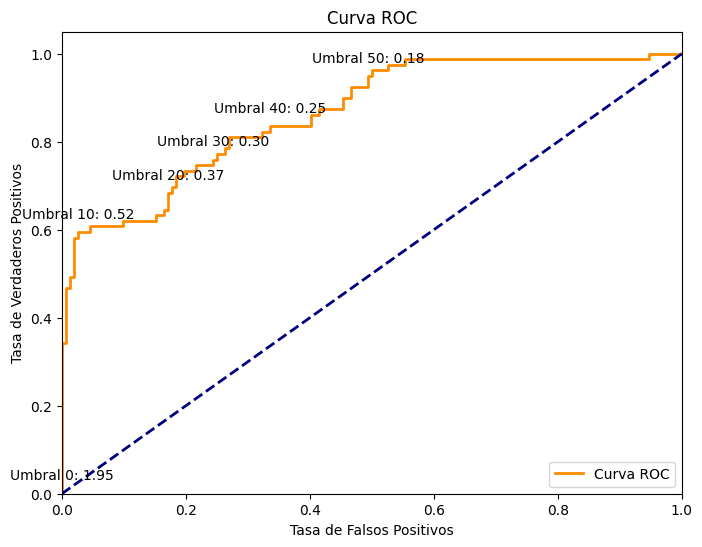

In [14]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

# Calcular las tasas de falsos positivos y verdaderos positivos junto con los umbrales
fpr, tpr, thresholds = roc_curve(y_test_mi, y_pred_probs)

# Crear la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend(loc="lower right")

# Agregar anotaciones para umbrales
for i, threshold in enumerate(thresholds):
    if i % 10 == 0:  # Anotar solo algunos puntos para evitar aglomeración
        plt.annotate(f'Umbral {i}: {threshold:.2f}',
                     (fpr[i], tpr[i]),
                     textcoords='offset points',
                     xytext=(0,10),
                     ha='center')

plt.show()


Aproximadamente en un umbral de 0.3 conseguimos un buen balance. Podriamos aumentar el umbral para disminuir la tasa de falsos positivos o disminuir el umbral para mejorar la tasa de verdaderos positivos.

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, balanced_accuracy_score, recall_score, f1_score,  precision_score

# Selección de variables basada en el análisis
X_mi_seleccion = df[["Glucose", 'BMI', 'Age', 'Pregnancies', 'DiabetesPedigreeFunction', 'BloodPressure']]

# Dividiendo los datos con mi selección de variables
X_train_mi, X_test_mi, y_train_mi, y_test_mi = train_test_split(X_mi_seleccion, y, test_size=0.30, random_state=82)

# Creando y entrenando el modelo con mi selección, como no estoy usando el scaler, hago 1000 iteraciones
logreg_mi = LogisticRegression(max_iter=1000)
logreg_mi.fit(X_train_mi, y_train_mi)

# Obteniendo las probabilidades predichas para la clase positiva
y_pred_probs = logreg_mi.predict_proba(X_test_mi)[:, 1]

In [25]:
# Define un nuevo umbral
nuevo_umbral = 0.30

# Aplicando el nuevo umbral para clasificar las predicciones
y_pred_umbral = (y_pred_probs >= nuevo_umbral).astype(int)

# Evaluando el modelo con el nuevo umbral
accuracy = accuracy_score(y_test_mi, y_pred_umbral)
balanced_accuracy = balanced_accuracy_score(y_test_mi, y_pred_umbral)
conf_matrix = confusion_matrix(y_test_mi, y_pred_umbral)
class_report = classification_report(y_test_mi, y_pred_umbral)
precision = precision_score(y_test_mi, y_pred_umbral)
f1_score_model = f1_score(y_test_mi, y_pred_umbral)
recall = recall_score(y_test_mi, y_pred_umbral)
specificity = recall_score(np.logical_not(y_test_mi) , np.logical_not(y_pred_umbral))

total_negatives = np.sum(y_pred_umbral == 0)
total_positives = np.sum(y_pred_umbral == 1)

# Imprimir los resultados con el nuevo umbral
print(f"Modelo con Umbral {nuevo_umbral}:\n")
print(f"Accuracy: {accuracy}\n")
print(f"Balanced Accuracy Score: {balanced_accuracy}\n")
print(f"Precision: {precision}\n")
print(f"Sensitivity: {recall}\n")
print(f"F1-Score: {f1_score_model}\n")
print(f"Specificity: {specificity}\n")


print(f"Negativos totales: {total_negatives}\n")
print(f"Positivos totales: {total_positives}\n")

print(f"Matriz de Confusión:\n{conf_matrix}\n")
print(f"Informe de Clasificación:\n{class_report}")

print (' -------------------------------------------------------------------')


Modelo con Umbral 0.3:

Accuracy: 0.7662337662337663

Balanced Accuracy Score: 0.7676548967355097

Precision: 0.6288659793814433

Sensitivity: 0.7721518987341772

F1-Score: 0.6931818181818181

Specificity: 0.7631578947368421

Negativos totales: 134

Positivos totales: 97

Matriz de Confusión:
[[116  36]
 [ 18  61]]

Informe de Clasificación:
              precision    recall  f1-score   support

           0       0.87      0.76      0.81       152
           1       0.63      0.77      0.69        79

    accuracy                           0.77       231
   macro avg       0.75      0.77      0.75       231
weighted avg       0.78      0.77      0.77       231

 -------------------------------------------------------------------


Ambos devuelven resultados muy parecidos, nos quedaremos con la opción indicada por RandomForest al tener con un umbral de 0.3 menor número de falsos negativos y positivos (1 menos en cada uno)

# Modelo con 0.3 de umbral:

Precisión (Accuracy):

77%


---



Matriz de Confusión:

Verdaderos Negativos (TN):

116

Verdaderos Positivos (TP):

61

Falsos Positivos (FP):

36

Falsos Negativos (FN):

18


Usaremos en principio el modelo con un umbral de 0.3

# Calculo manual de las métricas

In [26]:
# Cálculo manual de métricas usando la matriz de confusión

# Desglose de la matriz de confusión
TN = conf_matrix[0, 0]  # Verdaderos Negativos
FP = conf_matrix[0, 1]  # Falsos Positivos
FN = conf_matrix[1, 0]  # Falsos Negativos
TP = conf_matrix[1, 1]  # Verdaderos Positivos

# Cálculo de Accuracy
accuracy_manual = (TP + TN) / (TP + TN + FP + FN)

# Cálculo de Precision
precision_manual = TP / (TP + FP)

# Negative Predictive Value
NPV_manual = TN/(TN+FN)

# Cálculo de Sensitivity (Recall)
recall_manual = TP / (TP + FN)

# Cálculo de Specificity
specificity_manual = TN / (TN + FP)

# Cálculo de F1 Score
f1_score_manual = 2 * (precision_manual * recall_manual) / (precision_manual + recall_manual)

# Impresion


print (f'Accuracy: {accuracy_manual}')
print (f'Precisión: {precision_manual}')
print (f'NPV: {NPV_manual}')
print (f'Sensitivity (Recall): {recall_manual}')
print (f'Especificidad: {specificity_manual}')
print (f'F1 Score: {f1_score_manual}')

Accuracy: 0.7662337662337663
Precisión: 0.6288659793814433
NPV: 0.8656716417910447
Sensitivity (Recall): 0.7721518987341772
Especificidad: 0.7631578947368421
F1 Score: 0.6931818181818181


# Comparacion de las metricas

In [27]:
# Código para generar la tabla comparativa de métricas

import pandas as pd

# Calculando las métricas del modelo
model_accuracy = accuracy
model_precision = precision
model_recall = recall
model_f1 = f1_score_model

model_specificity = TN / (TN + FP)  # Usando los valores de TN y FP de la matriz de confusión

# Definiendo las métricas del modelo y las calculadas manualmente
metrics = {
    'Metrica': ['Accuracy', 'Precision', 'Recall', 'Specificity', 'F1 Score'],
    'Valor Modelo': [model_accuracy, model_precision, model_recall, model_specificity, model_f1],
    'Calculo manual': [accuracy_manual, precision_manual, recall_manual, specificity_manual, f1_score_manual]
}

# Creando un DataFrame a partir del diccionario
metrics_df = pd.DataFrame(metrics)

# Agregando columnas para verificar si las métricas son iguales y calcular la diferencia
metrics_df['Métricas iguales'] = metrics_df['Valor Modelo'] == metrics_df['Calculo manual']
metrics_df['Diferencia'] = abs(metrics_df['Valor Modelo'] - metrics_df['Calculo manual'])

# Generar la tabla
print(metrics_df)



       Metrica  Valor Modelo  Calculo manual  Métricas iguales  Diferencia
0     Accuracy      0.766234        0.766234              True         0.0
1    Precision      0.628866        0.628866              True         0.0
2       Recall      0.772152        0.772152              True         0.0
3  Specificity      0.763158        0.763158              True         0.0
4     F1 Score      0.693182        0.693182              True         0.0


# Limitaciones del Modelo de Regresión Logística

**Datos y Representatividad:**

* El modelo se ha entrenado en un conjunto de datos específico (mujeres Pima).Esto podría limitar su aplicabilidad a otros grupos demográficos o poblaciones.


* Los valores atípicos o los datos incorrectamente codificados (como 0 en algunas variables) pueden afectar la precisión del modelo.

**Variables Consideradas:**

* El modelo solo incluye variables disponibles en el conjunto de datos.

 Factores importantes no incluidos (como el estilo de vida o la historia familiar detallada) podrían influir en la precisión del diagnóstico.


**Errores de Modelo:**


* **Falsos Positivos y Falsos Negativos**: En un contexto médico, ambos tipos de errores tienen consecuencias significativas. Un falso positivo puede causar ansiedad y pruebas innecesarias, mientras que un falso negativo podría retrasar un tratamiento necesario. Teniendo en cuenta el contexto médico, buscamos detectar al máximo posible de personas con diabetes, evitando los falsos negativos.

* **Sobreajuste y Generalización**: Existe el riesgo de sobreajuste, esto puede afectar su capacidad para generalizar a nuevos datos.


** Modelo bueno o malo objetivamente **

El modelo predice correctamente aproximadamente el 75% de los casos tanto positivos como negativos, mantiene un buen balance de falsos positivos (specifity) y negativos (recall), debiendo bajar el umbral para obtener mayor seguridad al dar un diagnostico negativo.

# Comprensión de los resultados

# D. Análisis de variables predictoras

# Importancia de las variables seleccionadas

In [21]:
# Entrenamiento de un modelo Random Forest para evaluar la importancia de las variables
rf = RandomForestClassifier(n_estimators=100, random_state=82)
rf.fit(X_mi_seleccion, y)
feature_importances = rf.feature_importances_ * 100

# Mapeo de la importancia de las características a los nombres de las variables
features_rf = pd.DataFrame({'Feature': X_mi_seleccion.columns, 'Importance': feature_importances}).sort_values(by='Importance', ascending=False)

features_rf

,Feature,Importance
0,Glucose,29.352227
1,BMI,19.966036
2,Age,15.822410
4,DiabetesPedigreeFunction,15.502571
5,BloodPressure,10.324213
3,Pregnancies,9.032542


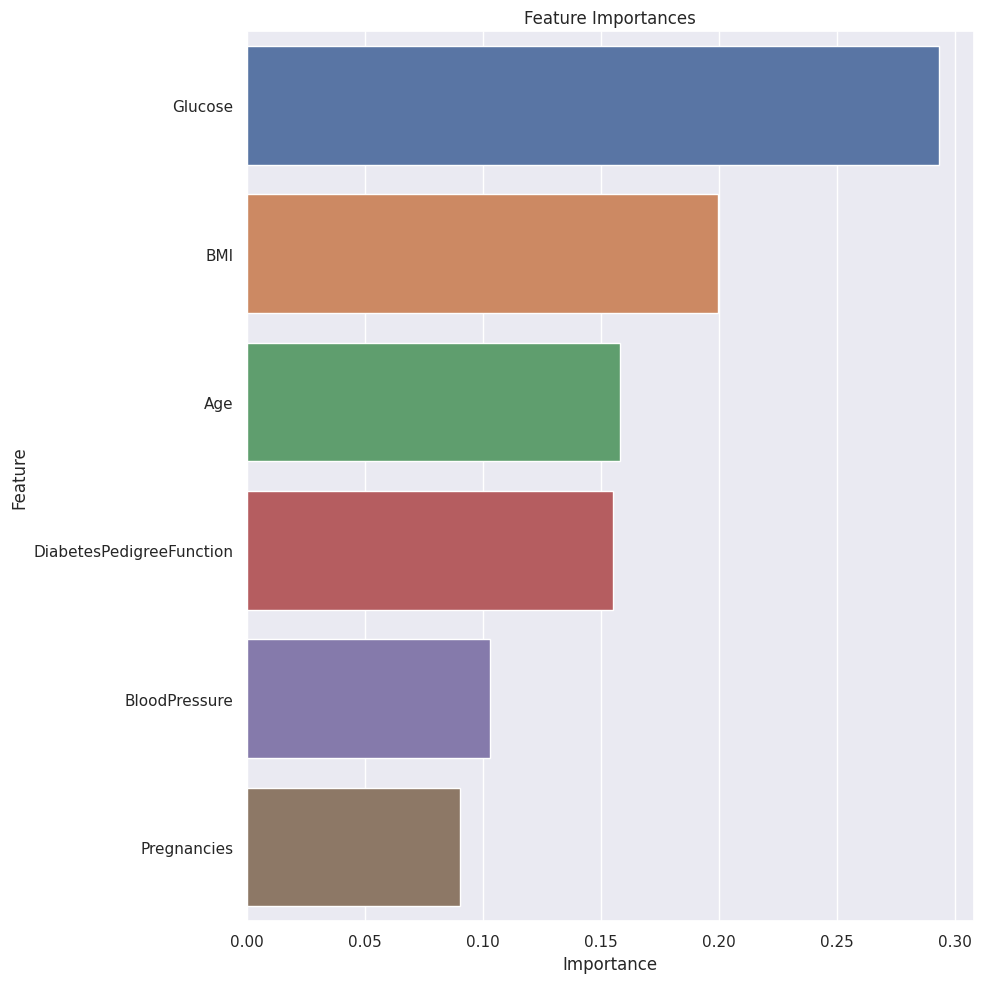

In [22]:
def plot_importance(model, features, num=len(X), save=False):
    feature_importances = pd.DataFrame({'Feature': features.columns, 'Importance': model.feature_importances_})

    # Ordenar el DataFrame por importancia
    feature_importances = feature_importances.sort_values("Importance", ascending=False)

    #graficar las importancias
    plt.figure(figsize=(10, 10))
    sns.set(font_scale=1)
    sns.barplot(x="Importance", y="Feature", data=feature_importances[0:num])
    plt.title('Feature Importances')
    plt.tight_layout()
    plt.show()

plot_importance(rf, X_mi_seleccion)

Este modelo de regresión logística presenta un potencial significativo como herramienta de cribado inicial en el contexto de la atención médica, particularmente para la identificación de individuos con un riesgo elevado de desarrollar diabetes. Las variables clave utilizadas para esta predicción incluyen la glucosa, el Índice de Masa Corporal (BMI), la edad, entre otros factores relevantes. Las principales aplicaciones y consideraciones del modelo son las siguientes:

**Herramienta de Triaje para Pruebas Adicionales:**

El modelo puede ser empleado eficazmente para determinar qué pacientes requieren un análisis más detallado y pruebas diagnósticas exhaustivas, basándose en la probabilidad de diabetes que el modelo predice.
Prevención y Cambios en el Estilo de Vida:

Para aquellos individuos que el modelo identifica con un riesgo moderado o bajo, puede ser una herramienta útil para guiar decisiones relacionadas con cambios en el estilo de vida. Esto incluye asesoramiento sobre nutrición, ejercicio y otros hábitos saludables.

**Evaluación de Umbrales y Riesgos Asociados:**

Al establecer el umbral en 0.5, el modelo arroja un número bajo de falsos positivos (5), lo cual es un compromiso aceptable para la realización de evaluaciones más profundas. Sin embargo, este mismo umbral resulta en un número considerablemente más alto de falsos negativos (32), lo que representa un riesgo significativo de no detectar casos reales de diabetes.

Es crucial considerar los resultados del modelo bajo diferentes umbrales, como 0.3 o incluso 0.1. Por ejemplo, para pacientes con una probabilidad superior al 20%, sería prudente realizar un seguimiento cercano o pruebas adicionales para confirmar los resultados.

En casos donde la probabilidad sea superior al 10%, se recomienda ofrecer asesoramiento para adoptar un estilo de vida más saludable. Esta estrategia minimiza la ansiedad que podría generar un diagnóstico positivo, al tiempo que asegura que un amplio porcentaje de pacientes con diabetes (78 de 79 en este caso) se mantengan bajo observación y cuidado preventivo

Evaluar la importancia de cada variable en lo que se refiere a su capacidad para predecir
la diabetes. Utilizar para ello la matriz de correlaciones. Proporciona el orden de relevancia
de mayor a menor en función del grado de correlación.

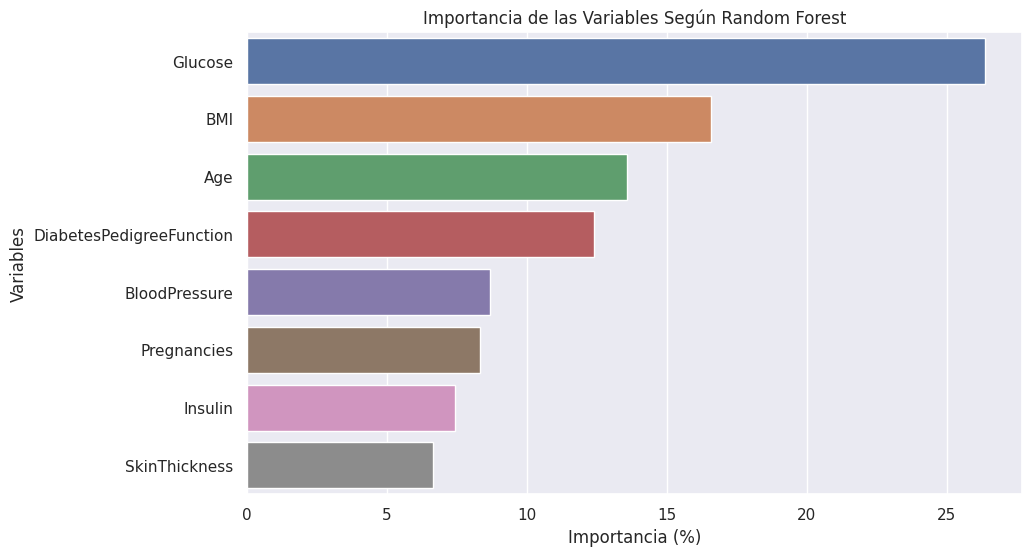

In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

# Asegúrate de que df es tu DataFrame con los datos de diabetes
# df = pd.read_csv('tu_archivo.csv')  # Descomenta y ajusta si es necesario

# Preparar las variables X e y
X = df.drop(['Outcome'], axis=1)
y = df['Outcome']

# Entrenar un modelo Random Forest para evaluar la importancia de las variables
rf = RandomForestClassifier(n_estimators=100, random_state=82)
rf.fit(X, y)
feature_importances = rf.feature_importances_ * 100

# Mapear la importancia de las características a los nombres de las variables
features_rf = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances}).sort_values(by='Importance', ascending=False)

# Crear un gráfico de barras para visualizar la importancia de las variables según Random Forest
plt.figure(figsize=(10, 6))
sns.barplot(x="Importance", y="Feature", data=features_rf)
plt.title('Importancia de las Variables Según Random Forest')
plt.xlabel('Importancia (%)')
plt.ylabel('Variables')
plt.show()